In [2]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

run = 20

rm = 0.005
D = 1
Dt = 2*D
kd= 4.0*math.pi*D*4*rm
ka = 0.1*kd
kr = 0.1*ka
T = 7
L = 1.5
V1 = L**3
kon = (ka*kd)/(ka+kd)
taum = (2./3)*(rm**2)/D
N = 100#int(conc*V2)
Nb=1

with species_attributes():
     A |B|C| {'D': str(D), 'radius':str(rm)}

with reaction_rules():#for spa and egfrd
     A + B == C | (ka,kr)
        
m1 = get_model()

spa = np.array(ensemble_simulations(run, T, y0={"A": N,'B': N}, model=m1, solver=("spatiocyte", rm), volume=V1,return_type='array'))
ts = spa[0][0][:,0]
nas = np.mean(spa[0][:,:,1],axis=0)



kr 0.125663706144 krn 0.11527989848
[0.025132741228718353, 0.023896849024339153, 0.023684154853372986] [0.022993544577856798, 0.022992808466603874, 0.022992083409414197]
dtau 0.00165
ka 0.0251327412287 ktm 0.022883643699 kt2 0.0229913691323
kd 0.251327412287 ka 0.0251327412287 kon 0.0228479465716
vol fract % 2.57111281143


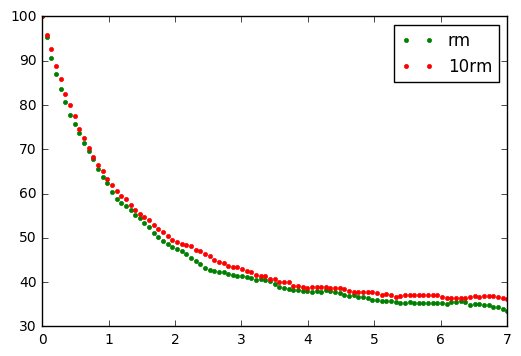

In [9]:
factor = 10
rv = factor*rm
V2 =  spatiocyte.SpatiocyteWorld(ones()*L,rv).get_volume()
tauv = (2./3)*(rv**2)/D
dtau = tauv - taum
phi = (100*2*N*4.*math.pi*(rv**3)/(3*V2)) 

def phix(x):
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def kt(tau):
    tauc = ((ka*2*rm/(ka+kd))**2)/(2*Dt)
    x = ka*((tau/tauc)**(0.5))/kd
    return kon*(1+(ka*phix(x)/kd))

kt2 = kt(dtau)
dt = dtau/100#fine resolution needed for produce accurate numerical integration
kts = [kt(t-taum) for t in np.arange(taum,tauv,dt)]
ktm = np.trapz(kts,dx=dt)/dtau
kd2= 4.0*math.pi*D*4*rv
krn = kr*(1+(ktm/kd2))/(1+(ka/kd))

print 'kr',kr,'krn',krn
print kts[:3],kts[-3:]
print 'dtau',dtau
print 'ka',ka,'ktm',ktm,'kt2',kt2
print 'kd',kd,'ka', ka,'kon', kon
print 'vol fract %',phi

with species_attributes():
     A |B|C| {'D': str(D), 'radius':str(rm)}

with reaction_rules():#for spa and egfrd
     A + B == C | (ka,kr)#(ktm,krn)
        
m2 = get_model()

spa2 = np.array(ensemble_simulations(10*run, T, y0={"A": N,'B': N}, model=m2, solver=("spatiocyte", rv), volume=V1,return_type='array'))
ts2 = spa2[0][0][:,0]
nas2 = np.mean(spa2[0][:,:,1],axis=0)

plt.plot(ts,nas,'g.',label='rm')
plt.plot(ts2,nas2,'r.',label=str(factor)+'rm')
plt.legend()


In [ ]:
#print 'aceptance prob, Prm',ap(ka,rm),'Prv',ap(kt2,rv)
#print 'no of a',N
#print 'no of b',N

#print taum,tauv
#print 'L',L
#print 'rv',rv,'rm',rm
#print 'actual vol',V2
#print 'Ls',Ls

#calculate intrinsic rm'
#fa = (3.14*Dt*taum)**0.5
#a = 0.5* fa
#b = 0.5*(fa*fa + ka*fa/(3.14*Dt))**0.5
#sol1 = -a+b
#sol2 = -a-b
#rr1 = (kd+ka)*sol1/2./ka
#rr2 = (kd+ka)*sol2/2./ka
#rr = rr1
#print 'soltn',rr1,rr2,rm

#def kt3(tau):
#    tauc = ((ka*2*rr/(ka+kd))**2)/(2*Dt)
#   x = ka*((tau/tauc)**(0.5))/kd
#    return kon*(1+(ka*phix(x)/kd))

#print kt3(taum),ka

x [  0.          15.55634919  22.        ]
tau 4.13223140496e-07
phis [1.0, 0.036198485223472326, 0.025620571414851901]
dx 0.01
kt [0.025132741228718353, 0.022930652677197877, 0.022906484316244084]
st [1.0, 0.9764231301739725, 0.9544563552763042]


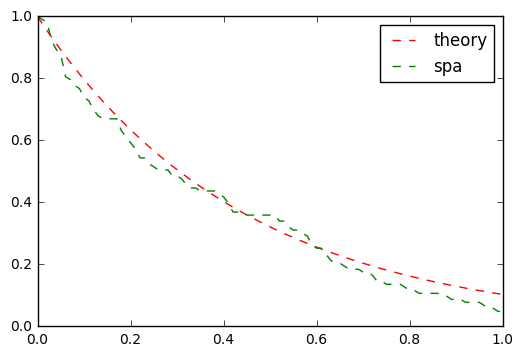

In [7]:
def phi(x):
    return [1./( (377.*xx/324)+(1+ (314.*(xx**2)/847) )**0.5) for xx in x]

def phi3(x):
    p = []
    l=len(x)
    for i in range(l):
        if (i==0):
            p.append(math.exp(x[i]**2)*math.erfc(x[i]))
        else:
            xi = 1./x[i]
            p.append((1./math.sqrt(math.pi))*xi*(1- 0.5*xi+0.75*xi**2-1.875*xi**3+6.5625*xi**4 -29.53125*xi**5))
    return p

def phi2(x):
    tt =1.0/(1.0+0.5*x) 
    phi = [t*math.exp(-1.26551223+t*(1.00002368+t*(0.37409196+t*(0.09678418+t*(-0.18628806+t*(0.27886807+t*(-1.13520398+t*(1.48851587+ t*(-0.82215223+t*0.17087277))))))))) for t in tt] 
    return phi

tau = ((ka*2*voxelr/(ka+kd))**2)/(2*D)
tt= ts#np.arange(0,ts[-1],1e-5)
x = ka*((tt/tau)**(0.5))/kd
print 'x',x[:3]
print 'tau',tau
phis = phi(x)
print 'phis',phis[:3]
#kt = [kon for phi in phis]
kt = [kon*(1+(ka*p/kd)) for p in phis]
st = []
dx = tt[2]-tt[1]
for i in range(len(tt)):
    st.append(math.exp(-(N/V2)*np.trapz(kt[0:i+1],dx=dx)))
print 'dx',dx
print 'kt',kt[:3]
print 'st',st[:3]
#plt.plot(tt,kt,'.')
plt.plot(tt,st,'r--',label='theory')
plt.plot(ts,nas/N,'g--',label='spa')
ax= plt.gca()
#ax.set_yscale("log")
plt.legend()